In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pomegranate import *
from math import cos, sin
import math
import seaborn as sns
from matplotlib import mlab
import itertools

### Part 1

In [87]:
def covariance(var_ratio, angle):
    V = np.array([[1.0,0.0], [0.0, var_ratio]]) #diagonal covariance
    R = np.array([[cos(angle), -sin(angle)],[sin(angle),cos(angle)]])
    cov = np.dot(np.dot(R,V), np.transpose(R))
    return cov

circle = covariance(1, 0)
cigar = covariance(0.1, 0)
ro_cigar = covariance(20, 1.2)

In [88]:
mean0 = [0, 0]
mean1 = [3, -2]
mean2 = [0, -2]

In [89]:
d1 = MultivariateGaussianDistribution(mean0,circle)
d2 = MultivariateGaussianDistribution(mean1,cigar)
d3 = MultivariateGaussianDistribution(mean2,ro_cigar)
model = GeneralMixtureModel([d1, d2, d3], weights=np.array([1/3, 1/3, 1/3]))

In [90]:
from mpl_toolkits.mplot3d import Axes3D

In [91]:
x = model.sample(1000)

In [92]:
a = np.array([i[0] for i in x])
b = np.array([i[1] for i in x])

In [93]:
X = np.column_stack([a,b])

In [94]:
def gen_dist(n):
    weights = np.array([1/n for i in range(n)])
    distributions = [MultivariateGaussianDistribution([np.random.random(),np.random.random()], 
                                                      covariance(np.random.randint(1,101)*0.01,np.random.randint(-10,11)*0.1))
                    for i in range(n)]
    model = GeneralMixtureModel(distributions, weights = weights)
    return model

#### Generate 2, 3, 4 component GMM fits

In [95]:
two = gen_dist(2)
two.fit(X)

7400.037112845961

In [96]:
three = gen_dist(3)
three.fit(X)

7189.697741987689

In [97]:
four = gen_dist(4)
four.fit(X)

6786.461547126615

In [100]:
def plot_contours(data, i):
    xx = np.arange(-10.0, 10.0, 0.1)
    yy = np.arange(-5.0, 5.0, 0.1)
    XX, YY = np.meshgrid(xx, yy)
    mux0 = data.distributions[i].parameters[0][0]
    muy0 = data.distributions[i].parameters[0][1]
    sigmax0 = data.distributions[i].parameters[1][0][0]
    sigmay0 = data.distributions[i].parameters[1][1][1]
    sigmaxy0 = data.distributions[i].parameters[1][0][1]
    Z0 = mlab.bivariate_normal(XX, YY,mux=mux0, muy=muy0,sigmax=math.sqrt(sigmax0), 
                               sigmay=math.sqrt(sigmay0), sigmaxy=sigmaxy0)
    
    return XX, YY, Z0

In [101]:
XX, YY, Z0 = plot_contours(two, 0)
XX, YY, Z1 = plot_contours(two, 1)

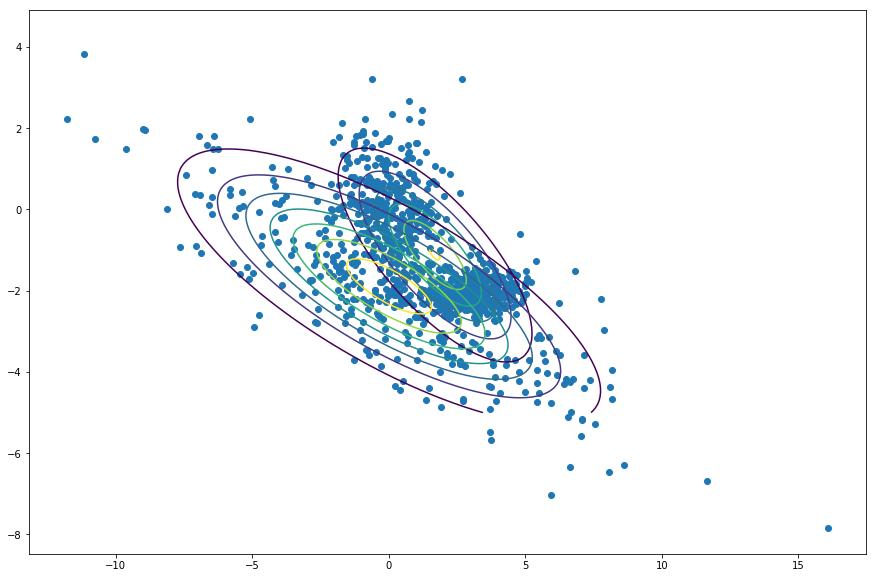

In [102]:
plt.figure(figsize=(15,10))
plt.scatter(a,b)
plt.contour(XX,YY,Z0)
plt.contour(XX,YY,Z1)

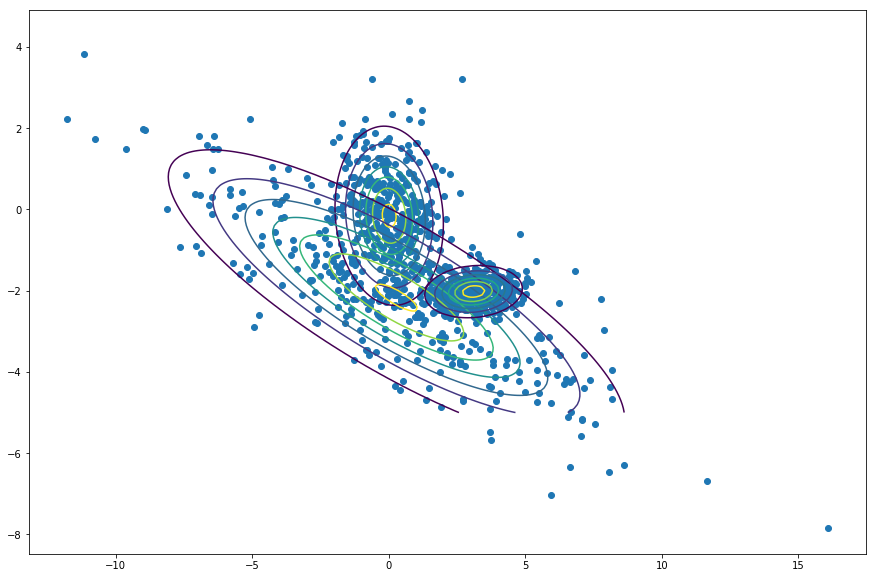

In [103]:
XX, YY, Z0 = plot_contours(three, 0)
XX, YY, Z1 = plot_contours(three, 1)
XX, YY, Z2 = plot_contours(three, 2)

plt.figure(figsize=(15,10))
plt.scatter(a,b)
plt.contour(XX,YY,Z0)
plt.contour(XX,YY,Z1)
plt.contour(XX,YY,Z2)

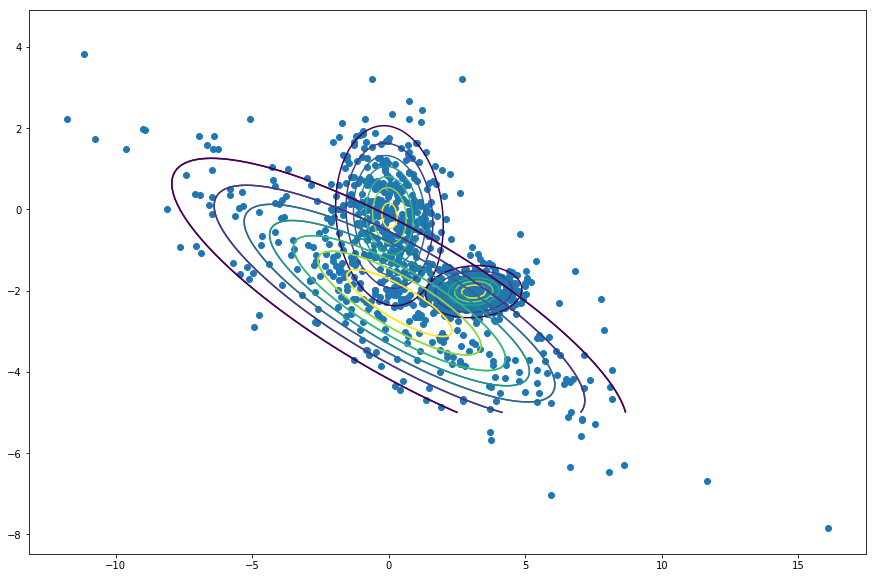

In [104]:
XX, YY, Z0 = plot_contours(four, 0)
XX, YY, Z1 = plot_contours(four, 1)
XX, YY, Z2 = plot_contours(four, 2)
XX, YY, Z3 = plot_contours(four, 2)

plt.figure(figsize=(15,10))
plt.scatter(a,b)
plt.contour(XX,YY,Z0)
plt.contour(XX,YY,Z1)
plt.contour(XX,YY,Z2)
plt.contour(XX,YY,Z3)

### Alternative Fit Method

In [105]:
m = [GeneralMixtureModel.from_samples(MultivariateGaussianDistribution, n_components=i, X=x) for i in range(2,5)]

In [106]:
XX, YY, Z0 = plot_contours(m[0],0)
XX, YY, Z1 = plot_contours(m[0],1)

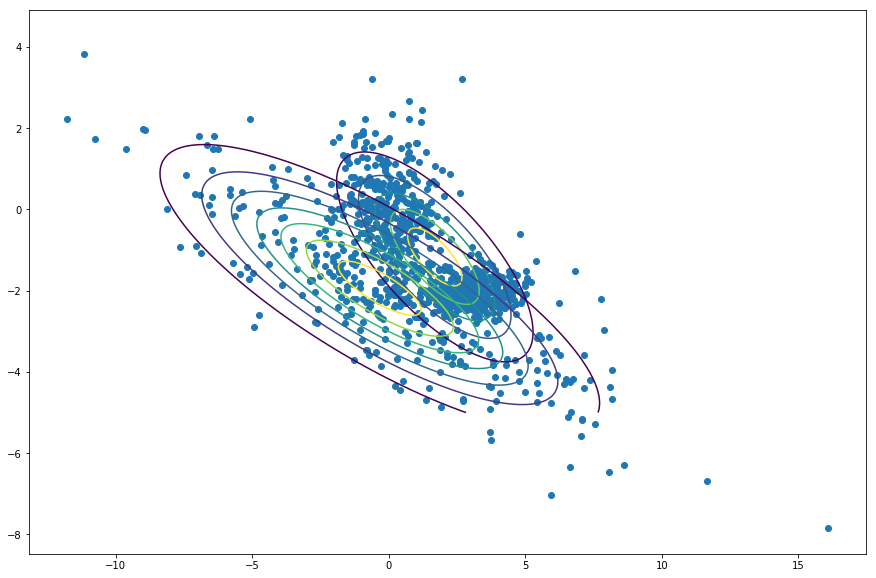

In [107]:
plt.figure(figsize=(15,10))
plt.scatter(a,b)
plt.contour(XX,YY,Z0)
plt.contour(XX,YY,Z1)

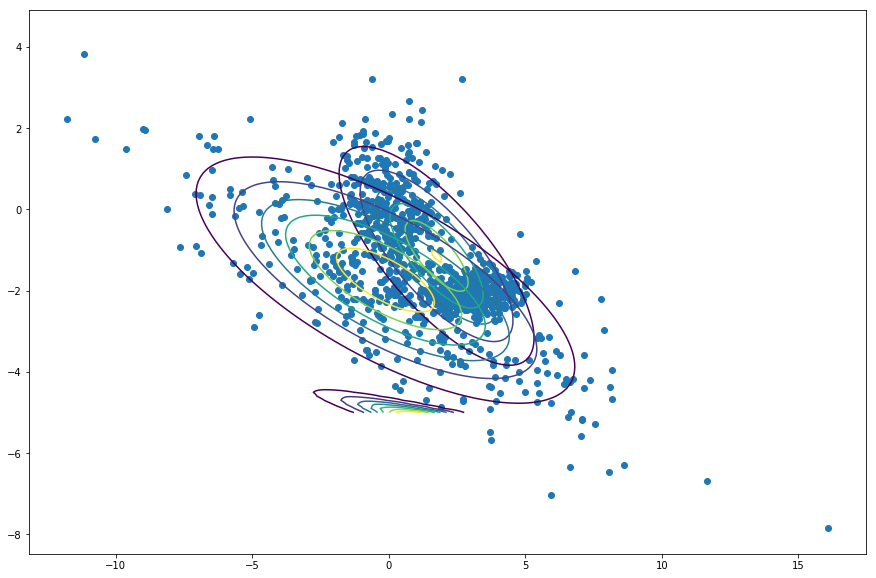

In [108]:
XX, YY, Z0 = plot_contours(m[1], 0)
XX, YY, Z1 = plot_contours(m[1], 1)
XX, YY, Z2 = plot_contours(m[1], 2)

plt.figure(figsize=(15,10))
plt.scatter(a,b)
plt.contour(XX,YY,Z0)
plt.contour(XX,YY,Z1)
plt.contour(XX,YY,Z2)

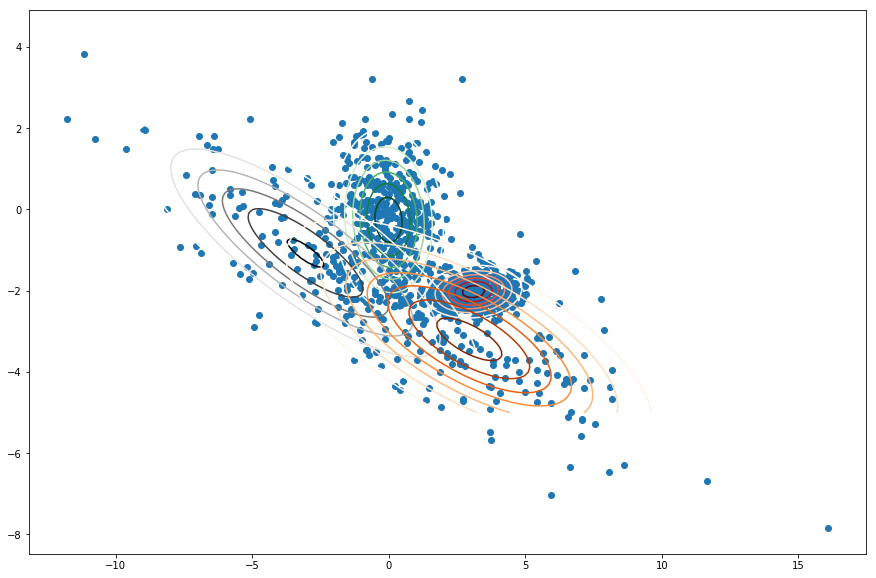

In [109]:
XX, YY, Z0 = plot_contours(m[2], 0)
XX, YY, Z1 = plot_contours(m[2], 1)
XX, YY, Z2 = plot_contours(m[2], 2)
XX, YY, Z3 = plot_contours(m[2], 3)

plt.figure(figsize=(15,10))
plt.scatter(a,b)
plt.contour(XX,YY,Z0, cmap='Reds')
plt.contour(XX,YY,Z1, cmap='Greens')
plt.contour(XX,YY,Z2, cmap='Greys')
plt.contour(XX,YY,Z3, cmap='Oranges')

## Part 2

Posteriors

In [110]:
model.predict_proba(X)

array([[  1.68374612e-14,   3.06806535e-21,   1.00000000e+00],
       [  4.33175476e-01,   1.57413204e-11,   5.66824524e-01],
       [  5.77438355e-06,   9.55942791e-01,   4.40514344e-02],
       ..., 
       [  9.26175853e-01,   3.00886919e-08,   7.38241172e-02],
       [  1.29903543e-04,   8.76269214e-01,   1.23600882e-01],
       [  9.03281234e-01,   6.24645577e-07,   9.67181413e-02]])

In [111]:
labels = model.predict(X)

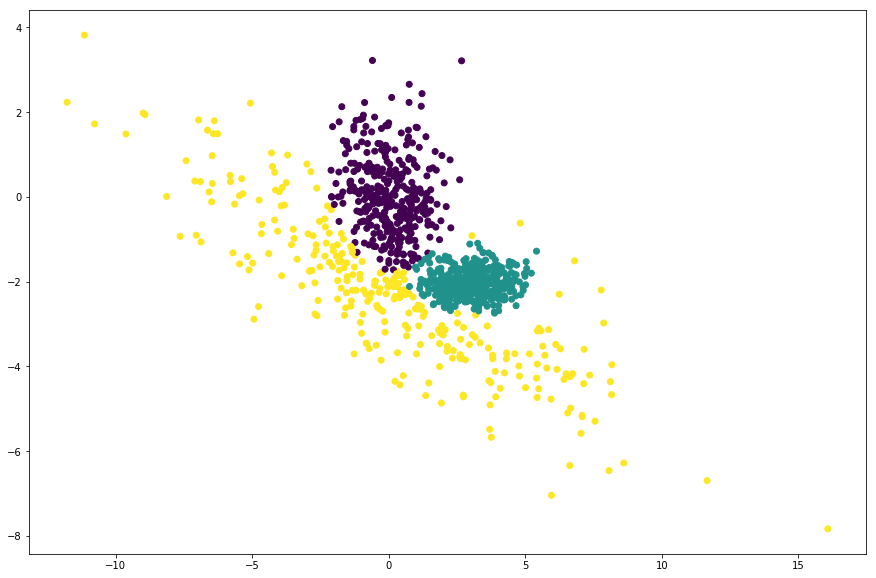

In [112]:
plt.figure(figsize=(15,10))
plt.scatter(a,b,c=labels)

## Part 3

In [113]:
from sklearn.utils import shuffle

In [114]:
df = pd.read_table('hyb.txt', header=None)

In [115]:
df_data = df[df.columns[2:]]

In [116]:
df_data.head()

,2,3,4,5,6,7,8,9,10,11,...,137,138,139,140,141,142,143,144,145,146
0,0.02434,-0.14945,-0.02903,-0.02999,0.17229,-0.03621,-0.14265,0.03601,0.07865,0.04454,...,-0.04141,-0.05145,0.06743,-0.42210,-0.34564,-0.06653,0.14564,0.00976,-0.05889,-0.24502
1,0.07473,-0.19599,0.01666,-0.31695,-0.00242,0.04669,-0.16062,-0.03947,-0.21643,-0.33035,...,0.06164,0.37626,0.11835,-0.57046,-0.19436,0.03778,-0.00537,-0.02104,0.34797,0.13538
2,0.08101,-0.10648,0.12160,-0.15464,0.06637,0.04238,-0.09141,0.01904,-0.18132,-0.15973,...,-0.07767,0.20441,0.08365,-0.41399,-0.03476,0.06792,0.29575,0.03641,0.10958,-0.35590
3,-0.28223,-0.21224,0.07389,-0.14664,-0.05142,0.04366,-0.03618,-0.16792,-0.25086,-0.12327,...,0.00551,0.35256,0.17607,-0.39054,-0.10296,0.06898,0.02741,-0.00401,0.11005,-0.13339
4,0.06920,0.48769,0.51505,0.21864,0.27885,-0.06230,0.14053,0.24533,0.25550,0.37062,...,0.08786,0.26676,-0.01482,0.29423,0.44351,0.36670,0.44040,0.20609,0.39248,0.29048


In [117]:
def params_init(X,n):
    '''
    Initialise emission probabilities using the quantiles of the overall distribution. 
    The data is split into n sections and the mean and variance for each section is calculated.
    
    Returns initialised means and variances as numpy arrays
    '''
    means = {}
    variances = {}
    X_split = {}


    seq_len = len(X)
    step = int(seq_len/n)
    seq = shuffle(X)
    
    for i in range(0,n):
        X_split[i] = X[(X > X.quantile(q=i/n)) & (X < X.quantile(q=(i+1)/n))]
        #seq[i*step:(i+1)*step]
        #X[(X > X.quantile(q=i/n)) & (X < X.quantile(q=(i+1)/n))]
    for i in range(len(X_split)):
        means[i] = np.mean(X_split[i])
        variances[i] = np.std(X_split[i])
    return means, variances

In [118]:
params_init(df_data.iloc[:,0], 3)

({0: -0.13155004195804196, 1: -0.0069599160839160842, 2: 0.1460756923076923},
 {0: 0.058266676367914404, 1: 0.029367754958825664, 2: 0.12146780591823762})

In [119]:
def HMM(N, means, variances):
    '''
    Creates a fully connected HMM with N states with a Gaussian pdf with means and variances as specified by
    the means and variances vectors.
    
    Returns the pomegranate model object
    '''
    #We assume that states will persist most of the time
    states = [State(NormalDistribution(means[i],variances[i]),
                    name=str(i)) for i in range(0,N)]
    model = HiddenMarkovModel()
    model.add_states(states)
    initialise = [model.add_transition(model.start, states[i], 1/N) for i in range(0,N)]
    transitions = [model.add_transition(states[k], states[j], 
                                        1/N) for (k,j) in itertools.product(range(0,N), repeat=2)]
    model.bake()
    return model

In [120]:
def compute_cycle(data, n):
    '''
    Step-wise model creation:
    - Initialise parameters
    - Initialise model
    '''
    means, variances = params_init(data, n)
    m = HMM(n,means,variances)
    return m

In [121]:
df_data.head()

,2,3,4,5,6,7,8,9,10,11,...,137,138,139,140,141,142,143,144,145,146
0,0.02434,-0.14945,-0.02903,-0.02999,0.17229,-0.03621,-0.14265,0.03601,0.07865,0.04454,...,-0.04141,-0.05145,0.06743,-0.42210,-0.34564,-0.06653,0.14564,0.00976,-0.05889,-0.24502
1,0.07473,-0.19599,0.01666,-0.31695,-0.00242,0.04669,-0.16062,-0.03947,-0.21643,-0.33035,...,0.06164,0.37626,0.11835,-0.57046,-0.19436,0.03778,-0.00537,-0.02104,0.34797,0.13538
2,0.08101,-0.10648,0.12160,-0.15464,0.06637,0.04238,-0.09141,0.01904,-0.18132,-0.15973,...,-0.07767,0.20441,0.08365,-0.41399,-0.03476,0.06792,0.29575,0.03641,0.10958,-0.35590
3,-0.28223,-0.21224,0.07389,-0.14664,-0.05142,0.04366,-0.03618,-0.16792,-0.25086,-0.12327,...,0.00551,0.35256,0.17607,-0.39054,-0.10296,0.06898,0.02741,-0.00401,0.11005,-0.13339
4,0.06920,0.48769,0.51505,0.21864,0.27885,-0.06230,0.14053,0.24533,0.25550,0.37062,...,0.08786,0.26676,-0.01482,0.29423,0.44351,0.36670,0.44040,0.20609,0.39248,0.29048


In [122]:
np.random.seed(100)

In [123]:
models = [compute_cycle(df_data.iloc[:,i],3) for i in np.random.choice(range(len(df_data.columns)),3)]

In [124]:
model = GeneralMixtureModel(models, weights=np.array([1/len(models) for i in range(len(models))]))

In [126]:
model.fit(df_data.transpose().as_matrix())

34.7003829068954

In [127]:
model.predict_proba(df_data.transpose().as_matrix())

array([[  3.52074860e-01,   4.03347817e-01,   2.44577323e-01],
       [  2.75055070e-01,   5.44845329e-01,   1.80099601e-01],
       [  3.62966274e-01,   3.13698686e-01,   3.23335040e-01],
       [  3.62186598e-01,   3.12690349e-01,   3.25123054e-01],
       [  9.40654978e-02,   6.53403524e-01,   2.52530978e-01],
       [  3.56042266e-01,   3.07990884e-01,   3.35966850e-01],
       [  2.69812258e-01,   5.44606828e-01,   1.85580913e-01],
       [  3.41087100e-01,   4.17509640e-01,   2.41403260e-01],
       [  2.74317951e-01,   4.54459976e-01,   2.71222073e-01],
       [  3.31595846e-01,   4.25704937e-01,   2.42699217e-01],
       [  3.52823430e-01,   3.07071291e-01,   3.40105279e-01],
       [  2.68920386e-01,   5.44176659e-01,   1.86902955e-01],
       [  2.65135114e-01,   4.54613786e-01,   2.80251100e-01],
       [  3.01454800e-01,   4.41722326e-01,   2.56822874e-01],
       [  1.14630326e-01,   5.58131435e-01,   3.27238239e-01],
       [  2.62641141e-01,   4.68572715e-01,   2.6878614

In [128]:
labels = model.predict(df_data.transpose().as_matrix())

In [129]:
indices = [[],[],[]]
for index,label in enumerate(labels):
    if label == 2:
        indices[2].append(index+2)
    elif label == 1:
        indices[1].append(index+2)
    else:
        indices[0].append(index+2)
        

## Seq-type 0

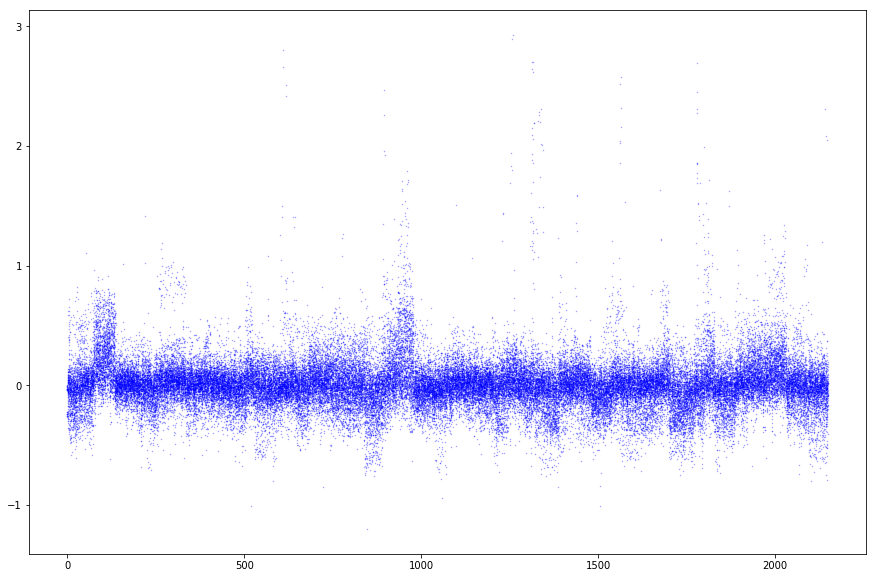

In [130]:
plt.figure(figsize=(15,10))
for i in indices[0]:
    plt.scatter(x=df_data.index,y=df_data[i], alpha=0.4, c='b', s=0.2)

## Seq-type 1

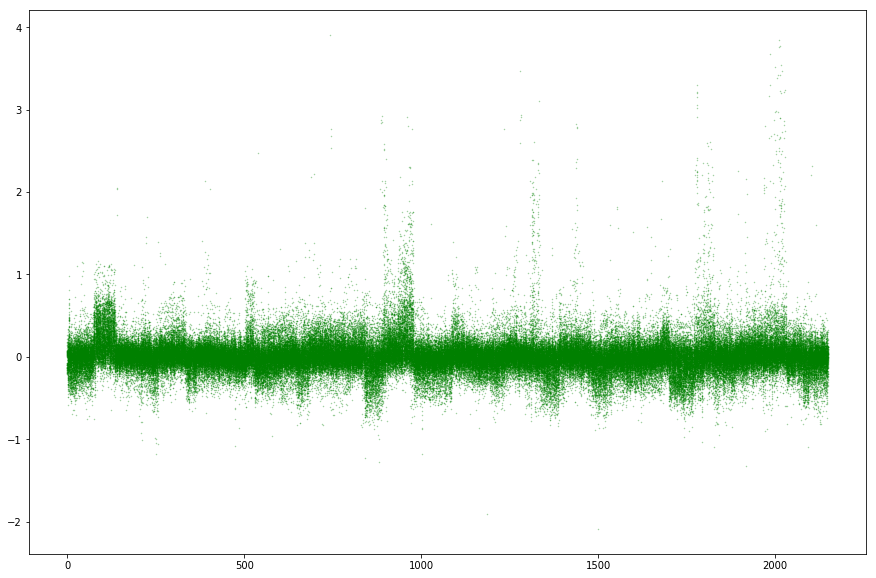

In [131]:
plt.figure(figsize=(15,10))
for i in indices[1]:
    plt.scatter(x=df_data.index,y=df_data[i], alpha=0.4, c='g', s=0.2)

## Seq-type 2

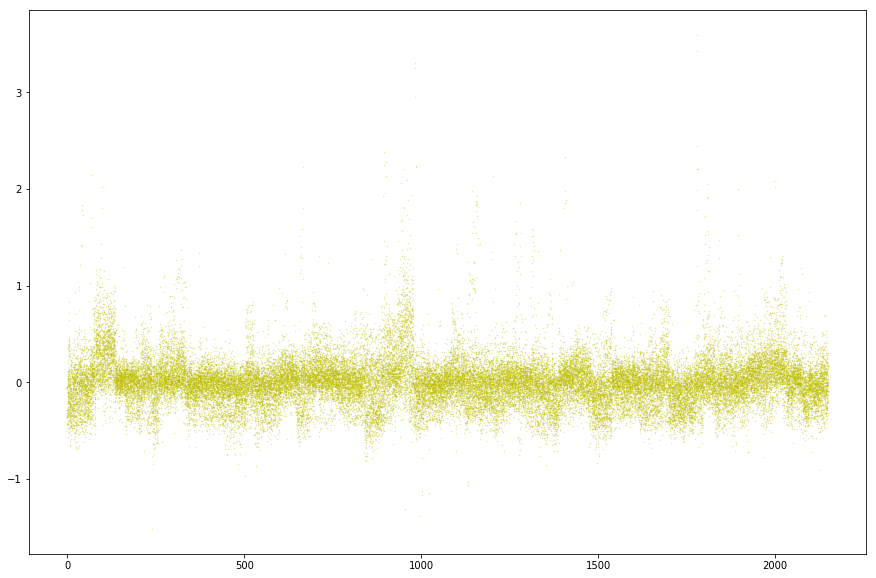

In [132]:
plt.figure(figsize=(15,10))
for i in indices[2]:
    plt.scatter(x=df_data.index,y=df_data[i], alpha=0.4, c='y', s=0.2)

## Part 4

In [133]:
m1 = compute_cycle(df_data.iloc[:,0], 1)
m2 = compute_cycle(df_data.iloc[:,0], 2)
m3 = compute_cycle(df_data.iloc[:,0], 3)

In [134]:
models = [m1,m2,m3]

In [135]:
model = GeneralMixtureModel(models, weights=np.array([1/len(models) for i in range(len(models))]))

In [136]:
model.fit(df_data.transpose().as_matrix())

48.31634505913491

In [137]:
labels = model.predict(df_data.transpose().as_matrix())

In [138]:
indices = [[],[],[]]
for index,label in enumerate(labels):
    if label == 2:
        indices[2].append(index+2)
    elif label == 1:
        indices[1].append(index+2)
    else:
        indices[0].append(index+2)
        

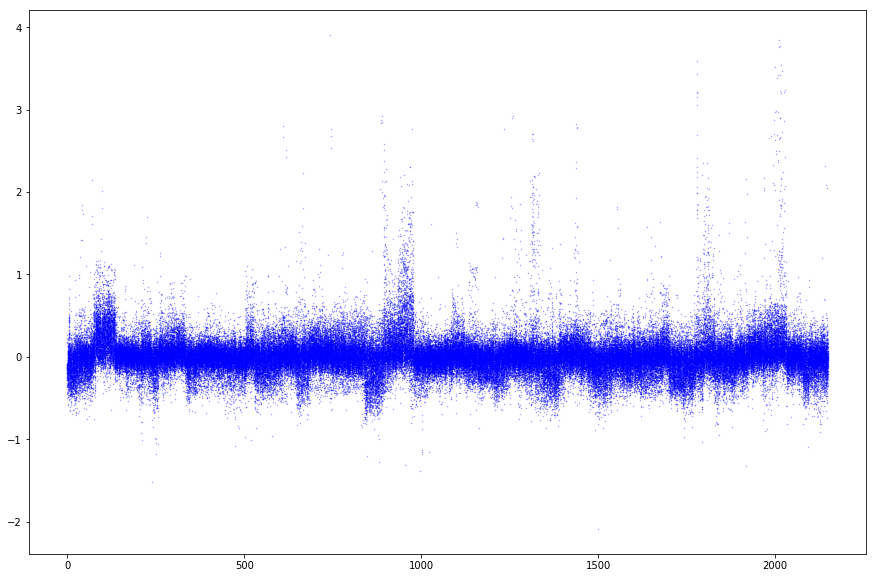

In [139]:
plt.figure(figsize=(15,10))
for i in indices[0]:
    plt.scatter(x=df_data.index,y=df_data[i], alpha=0.4, c='b', s=0.2)

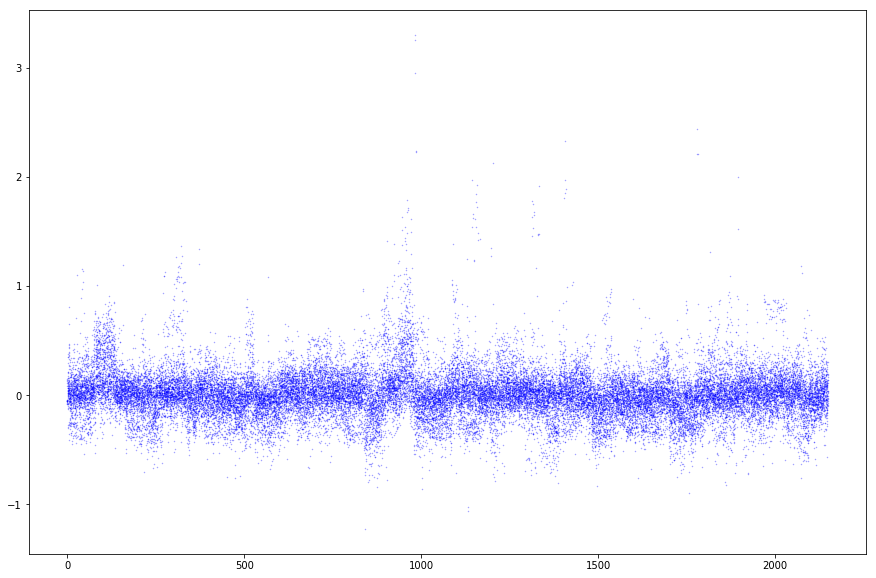

In [140]:
plt.figure(figsize=(15,10))
for i in indices[1]:
    plt.scatter(x=df_data.index,y=df_data[i], alpha=0.4, c='b', s=0.2)

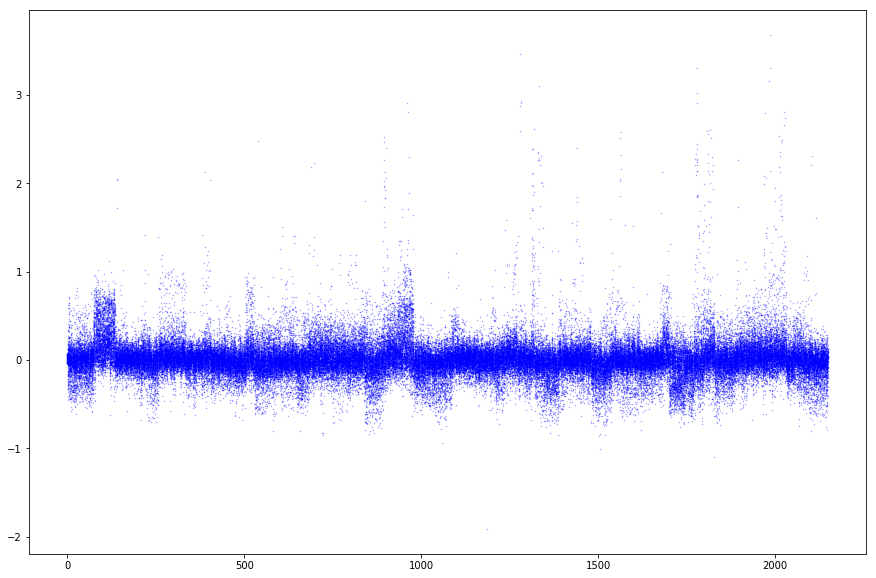

In [141]:
plt.figure(figsize=(15,10))
for i in indices[2]:
    plt.scatter(x=df_data.index,y=df_data[i], alpha=0.4, c='b', s=0.2)

So what we observed is that in some cases it may be useful to vary the number of component distributions within each HMM. For example, if we see that the general pattern jumps between two fixed levels, we may want to use 2 component distributions to capture this. Similarly, 3 components would try to model three different levels. A constant level could be modelled simply using 1 component distribution. Therefore, depending on the patterns we wish the model to detect, we may vary this to capture the underlying features to improve our model. 